In [3]:
import time
from mpu6050 import mpu6050
import numpy as np
import os
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

mpu = mpu6050(0x68)
mpu.set_accel_range(24)  #Acceptable  values: 0, 8, 16, 24

In [14]:
def print_figure(a, namestr):
    begin = 0       #Starting time step
    end = len(a)    #Number of steps from begin
    timeseries = range(begin, end)

    fig, ax = plt.subplots(figsize=(12,6))
    line0, = ax.plot([timeseries[0], timeseries[-1]], [0,0], '--k', alpha=0.25)
    line1, = ax.plot(timeseries, a[begin:end,1])
    line2, = ax.plot(timeseries, a[begin:end,2])
    line3, = ax.plot(timeseries, a[begin:end,3])
    line4, = ax.plot(timeseries, np.sqrt(np.sum(np.square(a[begin:end,1:4]), axis=1))-1, '--k')


    ax.set_xlabel('Time')
    ax.set_ylabel('Acceleration')
    ax.legend(['0', 'X', 'Y', 'Z', 'RSS'], loc='upper right')
    fig.savefig(namestr+'.png', dpi=150)
    return None

def show_figure(a, namestr):
    begin = 0       #Starting time step
    end = len(a)    #Number of steps from begin
    timeseries = range(begin, end)

    fig, ax = plt.subplots(figsize=(12,6))
    line0, = ax.plot([timeseries[0], timeseries[-1]], [0,0], '--k', alpha=0.25)
    line1, = ax.plot(timeseries, a[begin:end,1])
    line2, = ax.plot(timeseries, a[begin:end,2])
    line3, = ax.plot(timeseries, a[begin:end,3])
    line4, = ax.plot(timeseries, np.sqrt(np.sum(np.square(a[begin:end,1:4]), axis=1))-1, '--k')


    ax.set_xlabel('Time')
    ax.set_ylabel('Acceleration')
    ax.legend(['0', 'X', 'Y', 'Z', 'RSS'], loc='upper right')
#     fig.show()
#     fig.savefig(namestr+'.png', dpi=150)
    return fig
    

#Make LED on or off
ledblinkon = 'echo heartbeat | sudo tee /sys/class/leds/led0/trigger >/dev/null'
ledsolidon = 'echo 1 | sudo tee /sys/class/leds/led0/brightness >/dev/null'
ledsolidoff = 'echo 0 | sudo tee /sys/class/leds/led0/brightness >/dev/null'

#Turn on and off LED control
lednorm = 'echo mmc0 | sudo tee /sys/class/leds/led0/trigger >/dev/null'
ledoff = 'echo none | sudo tee /sys/class/leds/led0/trigger >/dev/null'


def cal_clock(rec_duration):
    a = np.zeros((2000, 4))
    for i in range(2000):
        t, d = time.clock(), mpu.get_accel_data(g = True)
        a[i] = [t, d['x'], d['y'], d['z']]
    return int(rec_duration/((a[-1,0]-a[0,0])/len(a)))


In [34]:
os.system(ledoff)
os.system(ledsolidon)

datapoints = 12000

a = np.zeros((datapoints, 4))
for i in range(datapoints):
    t, d = time.clock(), mpu.get_accel_data(g = True)
    a[i] = [t, d['x'], d['y'], d['z']]
print('Datapoints: {}'.format(len(a)))
print('Runtime: {}'.format(a[-1,0]-a[0,0]))
differ = np.diff(a[:,0])
print('Time Slice Avg, Max, Min: {} {} {}'.format((a[-1,0]-a[0,0])/datapoints, max(differ), min(differ)))

os.system(ledsolidoff)
os.system(lednorm)

namestr = 'output-{}'.format(time.strftime('%Y_%m_%d-%H_%M_%S'))

np.savetxt(namestr+'.txt.gz', a, delimiter=',', fmt='%1.9e')
print('Data file saved: {}'.format(namestr))

# show_figure(a, namestr)
# print_figure(a, namestr)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


Datapoints: 12000
Runtime: 3.968509000000001
Time Slice Avg, Max, Min: 0.0003307090833333334 0.00207200000000185 0.00011999999999900979
Data file saved: output-2019_10_03-17_46_49


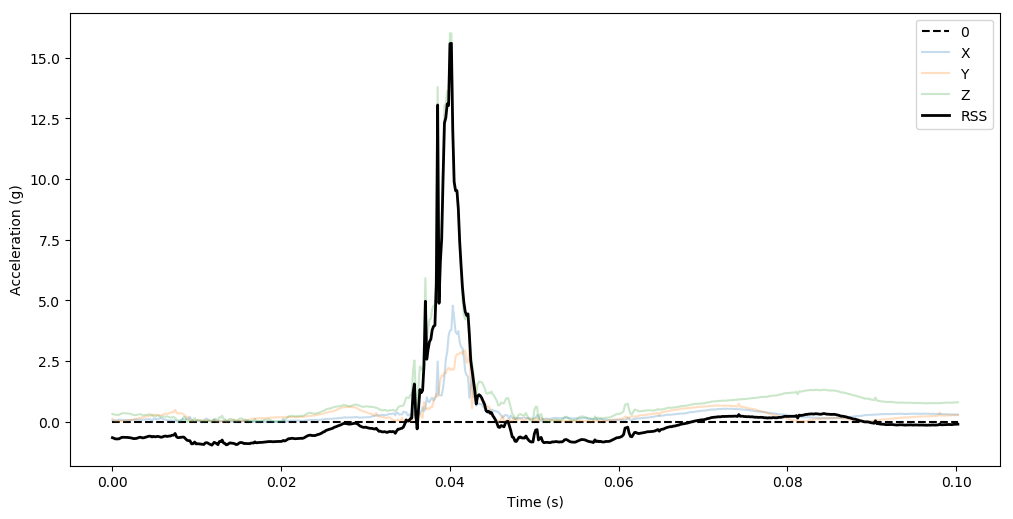

In [44]:
%matplotlib inline
fig = plt.figure(figsize=(12,6), dpi=100)
begin = 7200       #Starting time step
end = len(a)    #Number of steps from begin
end = 7800

# timeseries = range(begin, end)
timeseries = a[begin:end,0]-a[begin,0]
# plt.plot(a[begin:end,0], a[begin:end,1]-cal[0], a[begin:end,0], a[begin:end,2]-cal[1], a[begin:end,0], a[begin:end,3]-cal[2])
# plt.plot(a[begin:end,0], np.max(np.abs(a[begin:end,1:4]-cal), axis=1), '--r')
# plt.plot(a[begin:end,0], np.sqrt(np.sum(np.square(a[begin:end,1:4]), axis=1))-np.sqrt(np.sum(np.square(cal))), '--k')

# plt.plot(timeseries, a[begin:end,1]-cal[0], timeseries, a[begin:end,2]-cal[1], timeseries, a[begin:end,3]-cal[2])
# # plt.plot(timeseries, np.max(np.abs(a[begin:end,1:4]-cal), axis=1), '--r')
# plt.plot(timeseries, np.sqrt(np.sum(np.square(a[begin:end,1:4]), axis=1))-np.sqrt(np.sum(np.square(cal))), '--k')

plt.plot([timeseries[0], timeseries[-1]], [0,0], '--k')
plt.plot(timeseries, np.abs(a[begin:end,1]), alpha=0.25)
plt.plot(timeseries, np.abs(a[begin:end,2]), alpha=0.25)
plt.plot(timeseries, np.abs(a[begin:end,3]), alpha=0.25)


# plt.plot(timeseries, np.max(np.abs(a[begin:end,1:4]), axis=1), '--r')
plt.plot(timeseries, np.sqrt(np.sum(np.square(a[begin:end,1:4]), axis=1))-1, 'k', linewidth=2, alpha=1)


# plt.plot(range(len(a)-1), np.diff(a[:,0]))

plt.xlabel('Time (s)')
plt.ylabel('Acceleration (g)')
plt.legend(['0','X', 'Y', 'Z', 'RSS'])
# plt.savefig('testfig.png', dpi=150)
plt.show()

In [27]:
print(a[1:5,:])

[[15.918252    0.05078125  0.09228516 -0.95898438]
 [15.918415    0.04882812  0.10205078 -0.95898438]
 [15.91854     0.04638672  0.10205078 -0.95556641]
 [15.918665    0.04638672  0.09912109 -0.95019531]]
